# Andrew Rosscoe

***

# Sentiment Analysis and basic visualization of Scraped Twitter Data
***


### This is a general method using nltk libraries to analyze current tweets dynamically, based on a text based query within Twitter. 

### Since this is a guide it can be easily modified to extract different data points such as retweets, likes, or the top user (influencer) associated with positive or negative sentiment. 

### This method also provides basic models that can help analyze data prior to Keygraph input and Gephi visualization. Another benefit is that the data type can be easily converted into JSON to run in the keygraph.
***

### This notebook follows an example of 5000 scraped tweets on 06/30/2022 regarding a new trending and controversial topic, abortion. 

In [4]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [5]:
df = pd.read_csv('text-query-tweets.csv')
df.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,snscrape.modules.twitter.Tweet,https://twitter.com/JohnHardiman32/status/1476...,2021-12-30 23:59:56+00:00,@TomOHanlon17 @StephenMather6 Is it covid rant...,@TomOHanlon17 @StephenMather6 Is it covid rant...,1476704637159944195,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,3,...,NaN,NaN,NaN,1.476700e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN
1,snscrape.modules.twitter.Tweet,https://twitter.com/Meenakumari999/status/1476...,2021-12-30 23:59:15+00:00,Why The Abortion Rate In Pakistan Is One Of Th...,Why The Abortion Rate In Pakistan Is One Of Th...,1476704469337444358,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,snscrape.modules.twitter.Tweet,https://twitter.com/Chai_sina/status/147670439...,2021-12-30 23:58:58+00:00,I wonder whether Singapore legalized abortion ...,I wonder whether Singapore legalized abortion ...,1476704394150252552,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,snscrape.modules.twitter.Tweet,https://twitter.com/reynold98141096/status/147...,2021-12-30 23:58:49+00:00,@UsefulIdiot89 @trueman57 @SocialistMMA Where ...,@UsefulIdiot89 @trueman57 @SocialistMMA Where ...,1476704358595276800,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,NaN,1.476318e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN
4,snscrape.modules.twitter.Tweet,https://twitter.com/mylife82_/status/147670432...,2021-12-30 23:58:41+00:00,He is? I thought they forced an abortion on he...,He is? I thought they forced an abortion on he...,1476704323723837446,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,NaN,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Identify all columns and empty fields within the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   _type             5000 non-null   object 
 1   url               5000 non-null   object 
 2   date              5000 non-null   object 
 3   content           5000 non-null   object 
 4   renderedContent   5000 non-null   object 
 5   id                5000 non-null   int64  
 6   user              5000 non-null   object 
 7   replyCount        5000 non-null   int64  
 8   retweetCount      5000 non-null   int64  
 9   likeCount         5000 non-null   int64  
 10  quoteCount        5000 non-null   int64  
 11  conversationId    5000 non-null   int64  
 12  lang              5000 non-null   object 
 13  source            5000 non-null   object 
 14  sourceUrl         5000 non-null   object 
 15  sourceLabel       5000 non-null   object 
 16  outlinks          1106 non-null   object 


In [7]:
df.isnull().sum()

_type                  0
url                    0
date                   0
content                0
renderedContent        0
id                     0
user                   0
replyCount             0
retweetCount           0
likeCount              0
quoteCount             0
conversationId         0
lang                   0
source                 0
sourceUrl              0
sourceLabel            0
outlinks            3894
tcooutlinks         3894
media               4699
retweetedTweet      5000
quotedTweet         4647
inReplyToTweetId    1763
inReplyToUser       1763
mentionedUsers      1721
coordinates         4913
place               4913
hashtags            4659
cashtags            4999
dtype: int64

In [8]:
df.columns

Index(['_type', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags'],
      dtype='object')

### Remove all columns that are unneccessary for analysis

In [9]:
text_df = df.drop(['_type', 'url', 'date', 'renderedContent', 'id',
       'replyCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags'],
      axis=1)
text_df.head()

,content,user,retweetCount
0,@TomOHanlon17 @StephenMather6 Is it covid rant...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0
1,Why The Abortion Rate In Pakistan Is One Of Th...,"{'_type': 'snscrape.modules.twitter.User', 'us...",1
2,I wonder whether Singapore legalized abortion ...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0
3,@UsefulIdiot89 @trueman57 @SocialistMMA Where ...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0
4,He is? I thought they forced an abortion on he...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0


In [10]:
print(text_df['content'].iloc[0], "\n")
print(text_df['content'].iloc[1], "\n")
print(text_df['content'].iloc[2], "\n")
print(text_df['content'].iloc[3], "\n")
print(text_df['content'].iloc[4], "\n")

@TomOHanlon17 @StephenMather6 Is it covid rant’s or abortion rants you’re on about now? Hard to keep track. 

Why The Abortion Rate In Pakistan Is One Of The World's Highest : Goats and Soda : NPR https://t.co/KqzcgLPa06 

I wonder whether Singapore legalized abortion at the time? https://t.co/nKW8agjZFU 

@UsefulIdiot89 @trueman57 @SocialistMMA Where they on the same side on January 6?

How about abortion laws?

Voting rights?

Trans rights?

Affordable healthcare repeal?

Social net spending?

Climate change? 

He is? I thought they forced an abortion on her. https://t.co/wVdbmbGB8f 



In [11]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   content       5000 non-null   object
 1   user          5000 non-null   object
 2   retweetCount  5000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


### Process data to remove URL's, hashtags, @'s, and stopwords from the tweets

In [12]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+http\S+", '',text, flags=re.MULTILINE) # Remove URL's from tweets
    text = re.sub(r'\@w_|\#', '',text)                                    # Remove hashtags and @'s
    text = re.sub(r'[^\w\s]', '',text)                                    
    text_tokens = word_tokenize(text)                                     # Remove stopwords from text
    filtered_text = [w for w in text_tokens if not w in stop_words]       
    return " ".join(filtered_text) 

In [13]:
text_df.content = text_df['content'].apply(data_processing) # applys the pre-processing (above) to the text data

In [14]:
text_df = text_df.drop_duplicates('content') # Remove duplicate tweet data

In [15]:
stemmer = PorterStemmer()
# Function to do the stemming.
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [16]:
text_df['content'] = text_df['content'].apply(lambda x: stemming(x)) # Applies stemming into processed data.

In [17]:
text_df.head() # Newly stemmed data

,content,user,retweetCount
0,tomohanlon17 stephenmather6 covid rants aborti...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0
1,abortion rate pakistan one worlds highest goat...,"{'_type': 'snscrape.modules.twitter.User', 'us...",1
2,wonder whether singapore legalized abortion time,"{'_type': 'snscrape.modules.twitter.User', 'us...",0
3,usefulidiot89 trueman57 socialistmma side janu...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0
4,thought forced abortion,"{'_type': 'snscrape.modules.twitter.User', 'us...",0


In [18]:
print(text_df['content'].iloc[0], "\n")
print(text_df['content'].iloc[1], "\n")
print(text_df['content'].iloc[2], "\n")
print(text_df['content'].iloc[3], "\n")
print(text_df['content'].iloc[4], "\n")

tomohanlon17 stephenmather6 covid rants abortion rants youre hard keep track 

abortion rate pakistan one worlds highest goats soda npr 

wonder whether singapore legalized abortion time 

usefulidiot89 trueman57 socialistmma side january 6 abortion laws voting rights trans rights affordable healthcare repeal social net spending climate change 

thought forced abortion 



In [19]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4826 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   content       4826 non-null   object
 1   user          4826 non-null   object
 2   retweetCount  4826 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 150.8+ KB


## Utilize textblob for NLP to calculate sentiment regarding all tweets

In [20]:
# Define function to calculate the text polarity using textblob
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [21]:
# calculate the polarity of the text and add it to the data frame.

text_df['polarity'] = text_df['content'].apply(polarity)


In [22]:
text_df.head(10) # pre-processed data

,content,user,retweetCount,polarity
0,tomohanlon17 stephenmather6 covid rants aborti...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,-0.291667
1,abortion rate pakistan one worlds highest goat...,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0.000000
2,wonder whether singapore legalized abortion time,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0.000000
3,usefulidiot89 trueman57 socialistmma side janu...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0.016667
4,thought forced abortion,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,-0.300000
5,ok im vol day every day fucking defense absolu...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0.025000
6,mfs like could support abortions youre killing...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,-0.400000
7,notabrokenthing jelly bean gave article aborti...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0.000000
8,emmajclemmons deadtosin610 bumpkinou812 trish_...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0.200000
9,fahey9fahey say 1000 dead gasp horror thousand...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,-0.200000


In [23]:
# Define function to calculate the sentiment
def sentiment(label):
    if label < 0:
        return "Negative"
    elif label == 0:
        return "Neutral"
    elif label > 0:
        return "Positive"

In [24]:
# apply sentiment function to dataframe
# This essentialy takes in the polarity value and returns the associated label

text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [25]:
text_df.head(10) # pre-processed data

,content,user,retweetCount,polarity,sentiment
0,tomohanlon17 stephenmather6 covid rants aborti...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,-0.291667,Negative
1,abortion rate pakistan one worlds highest goat...,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0.000000,Neutral
2,wonder whether singapore legalized abortion time,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0.000000,Neutral
3,usefulidiot89 trueman57 socialistmma side janu...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0.016667,Positive
4,thought forced abortion,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,-0.300000,Negative
5,ok im vol day every day fucking defense absolu...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0.025000,Positive
6,mfs like could support abortions youre killing...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,-0.400000,Negative
7,notabrokenthing jelly bean gave article aborti...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0.000000,Neutral
8,emmajclemmons deadtosin610 bumpkinou812 trish_...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0.200000,Positive
9,fahey9fahey say 1000 dead gasp horror thousand...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,-0.200000,Negative


<AxesSubplot:xlabel='sentiment', ylabel='count'>

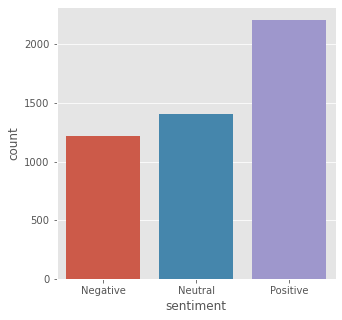

In [26]:
# Visualize data using count plot

fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of Sentiments')

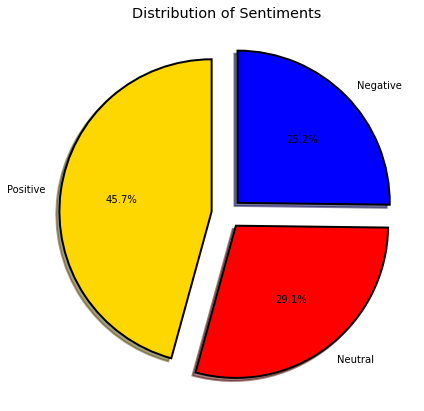

In [27]:
# Explore the data with a pie chart

fig = plt.figure(figsize=(7,7))                                                         # Define pie chart size
colors = ('gold', 'red', 'blue')                                                        # Define colors of pie chart
wp = {'linewidth':2, 'edgecolor':"black"}                                               # Define line width and edge color
tags = text_df['sentiment'].value_counts()                                              # Specify tags in pie chart
explode = (0.1,0.1,0.1)                                                                 # Specify distance for how much wedges to be exploded
tags.plot(kind='pie', autopct = '%1.1f%%', shadow = True, colors = colors,              
                        startangle=90, wedgeprops = wp, explode = explode, label = '')  # Plots the pie chart
plt.title('Distribution of Sentiments')                                                 # Title for the pie chart

In [28]:
# Explore top 5 tweets for Positive Sentiment

pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending=False)
pos_tweets.head() 

,content,user,retweetCount,polarity,sentiment
2444,mattmackowiak mayoradler gregcasar abortions g...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1.0,Positive
673,one best threads unpacks troublesome narrative...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1.0,Positive
4902,jon2allen seanhannity think democrats allowed ...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1.0,Positive
1699,zoobaby9 abortion sometimes best option,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1.0,Positive
2448,repreaux lot womens concern dont go skipping t...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1.0,Positive


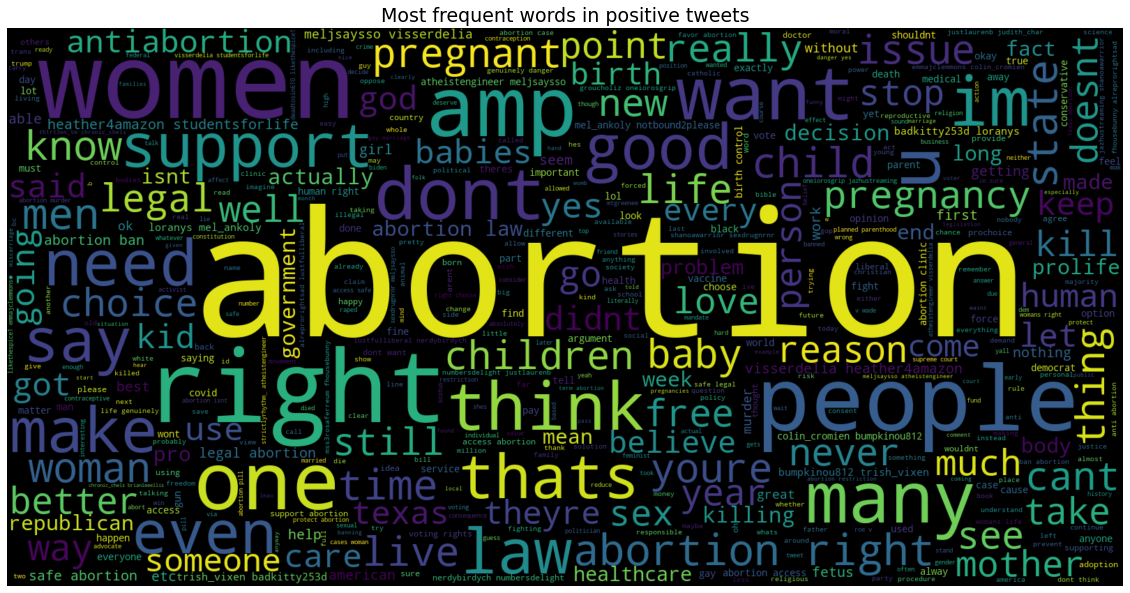

In [39]:
# Use a word plot to visualize all the positive tweets

text = ' '.join([word for word in pos_tweets['content']])
plt.figure(figsize=(20,15), facecolor='None')
WordCloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [29]:
# Explore top 5 tweets for Negative Sentiment

neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending=False)
neg_tweets.head() 

,content,user,retweetCount,polarity,sentiment
2260,popular information ollowing money behind abor...,"{'_type': 'snscrape.modules.twitter.User', 'us...",3,-9.251859e-18,Negative
1771,suegent00874610 ty sweetie good bye gov blackf...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,-1.387779e-17,Negative
2756,crazy_catholic jamierobinsjg01 notabrokenthing...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,-2.775558e-17,Negative
3003,false narrative abortion industry falling apar...,"{'_type': 'snscrape.modules.twitter.User', 'us...",70,-2.775558e-17,Negative
1221,likethespice1 deadtosin610 eyeedinburgh colin_...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,-7.305195e-04,Negative


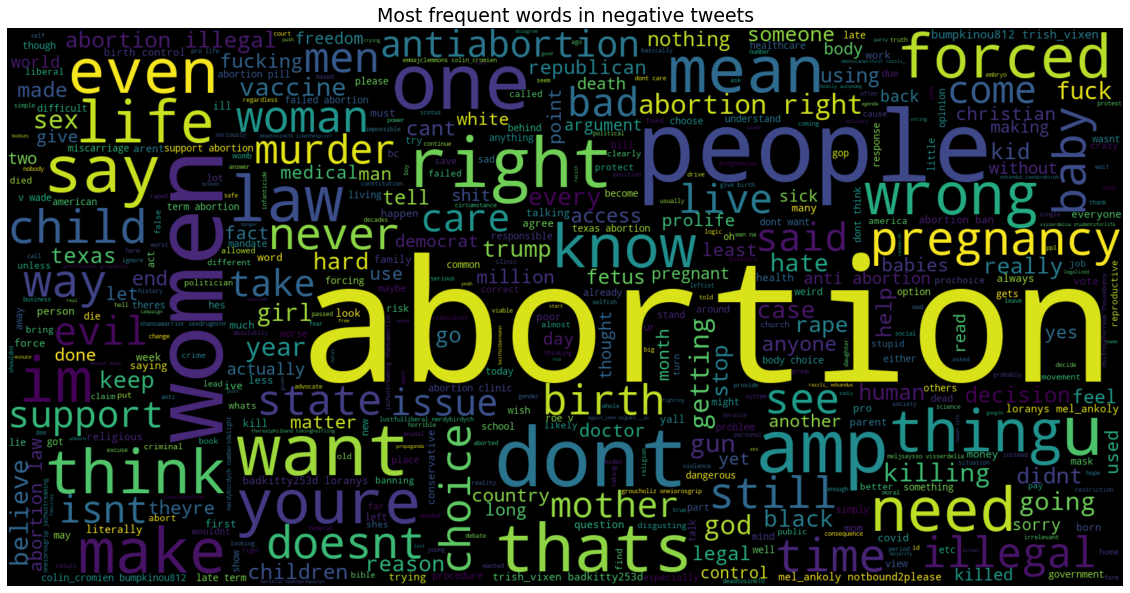

In [30]:
# Use a word plot to visualize all the negative tweets

text = ' '.join([word for word in neg_tweets['content']])
plt.figure(figsize=(20,15), facecolor='None')
WordCloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

## Utilize CountVectorizer or other associated NLP technique to test for accuracy. Also, provide a confusion matrix visual to easier identify sentiment among the data

In [31]:
# Perform Countvectoriztion on the data
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['content'])

In [32]:
# get the number of features and print the first 20 features

feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 77800

First 20 features:
 ['0000', '0000 cases', '00001', '00001 chance', '0005', '0005 occurrence', '001', '001 percent', '01', '08', '08 houses', '08av8r', '08av8r xan_desanctis', '0925', '0925 safeabortion', '0x526978', '0x526978 atheist_1978', '10', '10 30', '10 americans']


C:\Users\aross\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [33]:
# Separate data into x and y and them transform the x data

X = text_df['content']
Y = text_df['sentiment']
X = vect.transform(X)

In [49]:
# Puts data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)   #Test size of 20% percentage

In [50]:
# put in size of training and testing data
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (3860, 77800)
Size of y_train: (3860,)
Size of x_test: (966, 77800)
Size of y_test: (966,)


In [51]:
# remove the warnings
import warnings
warnings.filterwarnings('ignore')

# train data on a logistic regression model

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)                    # predict value for the given test data
logreg_acc = accuracy_score(logreg_pred, y_test)        # calculate the accuracy for the model
print("Test accuracy: {:.2f}%".format(logreg_acc*100))  # print the accuracy

Test accuracy: 73.08%


In [52]:
# Print the confusion matrix and the classification report

print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[129  50  63]
 [ 13 242  44]
 [ 26  64 335]]


              precision    recall  f1-score   support

    Negative       0.77      0.53      0.63       242
     Neutral       0.68      0.81      0.74       299
    Positive       0.76      0.79      0.77       425

    accuracy                           0.73       966
   macro avg       0.74      0.71      0.71       966
weighted avg       0.74      0.73      0.73       966



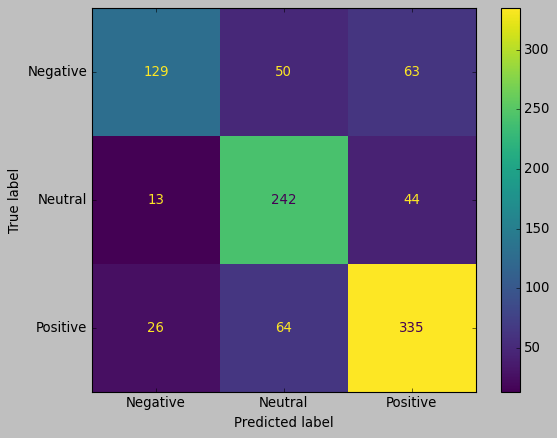

In [53]:
# another way visualize the confusion matrix
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
display = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=logreg.classes_)
display.plot()